# Interconnect  

## 1-Overview

Interconnect provides both internet and phone services. I am being hired to develop a machine learning model to help retain customers by predicting the likelihood of cancellations (churn). This model will enable the company to identify and target at-risk customers with promotions to improve loyalty. 

The primary evaluation metric for the model is AUC-ROC, with accuracy as an additional metric.

### 1.1-Project Plan

1. **Initialization and Data Loading**  
   - **Objective:** Set up the environment and load the dataset.  
   - **Key Steps:** Configure tools, load data, inspect structure and quality.  
   - **Deliverables:** Environment setup, dataset ready for analysis.

2. **Data Cleaning and Preparation**  
   - **Objective:** Ensure data quality and relevance.  
   - **Key Steps:** Handle missing values, outliers, feature engineering, encoding, scaling, and EDA.  
   - **Deliverables:** Cleaned dataset with insights for modeling.

3. **Model Training**  
   - **Objective:** Train and optimize churn prediction models.  
   - **Key Steps:** Split data, test algorithms (e.g., logistic regression, random forest), and optimize hyperparameters.  
   - **Deliverables:** Trained models with performance metrics.

4. **Model Evaluation**  
   - **Objective:** Finalize the best-performing model.  
   - **Key Steps:** Compare models, assess on AUC-ROC and accuracy, validate performance.  
   - **Deliverables:** Final model with performance documentation.

5. **Deployment Preparation**  
   - **Objective:** Make the model deployment-ready.  
   - **Key Steps:** Package the model, create prediction scripts, and test integration.  
   - **Deliverables:** Deployment-ready package with usage instructions.

6. **Reporting and Recommendations**  
   - **Objective:** Summarize outcomes and propose next steps.  
   - **Key Steps:** Present findings, highlight churn drivers, and recommend prevention strategies.  
   - **Deliverables:** Final report with actionable insights.

### 1.2-Questions

1. **What features in the dataset can help differentiate customers who are likely to churn, such as service type (internet or phone), usage patterns, or customer demographics?**  

2. **Are there any data points related to customer behavior, such as frequency of complaints, payment history, or subscription duration, that could indicate churn risk?**  

3. **What proportion of customers currently churn, and are there significant differences in churn rates between internet and phone services?**  

4. **Are there any missing or inconsistent data points, and how might they impact the analysis of churn trends?**  

## 2-Initialization

Imports in Jupyter notebooks allow users to access external libraries for extended functionality and facilitate code organization by declaring dependencies at the beginning of the notebook, ensuring clear and efficient development.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. **Pandas**: is a Python library for data manipulation and analysis, providing data structures like DataFrames for managing labeled data.

2. **NumPy**: is a Python library for numerical computing that provides support for arrays, matrices, and high-level mathematical functions.

3. **Matplotlib**: is a Python library for creating static, interactive, and animated visualizations, offering a flexible environment for plotting data.


In [2]:
contract = pd.read_csv('./datasets/contract.csv')
internet = pd.read_csv('./datasets/internet.csv')
personal = pd.read_csv('./datasets/personal.csv')
phone = pd.read_csv('./datasets/phone.csv')

Each line in the code snippet reads a different CSV file from the `./datasets/` directory and loads it into a DataFrame using the `pd.read_csv()` function from the `pandas` library. Specifically, `contract.csv` is loaded into the `contract` DataFrame, `internet.csv` into the `internet` DataFrame, `personal.csv` into the `personal` DataFrame, and `phone.csv` into the `phone` DataFrame. 

In [3]:
display(contract.head(), internet.head(), personal.head(), phone.head())

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In these datasets, a notable feature is that all columns share the `customerID` column. This common column acts as a unique identifier across the DataFrames (`contract`, `internet`, `personal`, and `phone`), allowing for seamless merging or joining of these datasets.

## 3-Preparation

### 3.1-Cleaning the Data

Next, the data will be processed and prepared for the task assigned by Interconnect.

In [4]:
def process(df):
    missing = df.isna().sum()
    duplicates = df.duplicated().sum()
    print(f'{df.info()}\n\nNumber of missing values:\n{missing}\n\nNumber of duplicated rows: {duplicates}')

The `process` function checks data quality in a DataFrame `df`. It calculates missing values per column (`missing`) and counts duplicated rows (`duplicates`). It displays the DataFrame structure with `df.info()` and prints the missing values and duplicate counts, aiding in identifying data issues.

In [5]:
process(contract)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None

Number of missing values:
customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

Number of duplicated rows: 0


All data for `contract` appears non-problematic, except for the data types of the columns `EndDate`, `BeginDate`, and `TotalCharges`.

In [6]:
contract['EndDate'] = contract['EndDate'].replace('No', '2025-01-01 00:00:00')
contract['EndDate'] = pd.to_datetime(contract['EndDate'], errors='coerce')
contract['BeginDate'] = pd.to_datetime(contract['BeginDate'], errors='coerce')
contract['TotalCharges'] = pd.to_numeric(contract['TotalCharges'], errors='coerce')
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,2025-01-01,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,2025-01-01,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,2025-01-01,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65


This cleans and standardizes date columns in the `contract` DataFrame. It replaces any `'No'` values in the `EndDate` column with `'2025-01-01 00:00:00'`, ensuring a valid date format. Then, it converts both `EndDate` and `BeginDate` columns to datetime format using `pd.to_datetime`. Lastly the `TotalCharges` column is converted to numeric values.

In [7]:
process(internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None

Number of missing values:
customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

Number of duplicated rows: 0


The `internet` data appears to be correct.

In [8]:
process(personal)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None

Number of missing values:
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

Number of duplicated rows: 0


The `personal` data appears to be correct.

In [9]:
process(phone)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None

Number of missing values:
customerID       0
MultipleLines    0
dtype: int64

Number of duplicated rows: 0


The `phone` data appears to be correct.

### 3.2-Feature Engineering

The data will be refined for better usability in modeling.

In [10]:
df = pd.merge(contract, internet, on='customerID', how='outer')
df = pd.merge(df, personal, on='customerID', how='outer')
df = pd.merge(df, phone, on='customerID', how='outer')
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,2025-01-01,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,2025-01-01,One year,No,Mailed check,56.95,1889.50,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,2025-01-01,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


This merges four data frames on `customerID`.

In [11]:
process(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   InternetService   5517 non-null   object        
 9   OnlineSecurity    5517 non-null   object        
 10  OnlineBackup      5517 non-null   object        
 11  DeviceProtection  5517 non-null   object        
 12  TechSupport       5517 non-null   object        
 13  StreamingTV       5517 non-null   object        
 14  StreamingMovies   5517 n

Some missing values appear after merging all data frames, which is expected given their differing shapes.

In [12]:
difference1 = df.shape[0] - contract.shape[0]
difference2 = df.shape[0] - internet.shape[0]
difference3 = df.shape[0] - personal.shape[0]
difference4 = df.shape[0] - phone.shape[0]
print(f'The difference between the merged dataframe and the original dataframes is:\ncontract: {difference1} rows\ninternet: {difference2} rows\npersonal: {difference3} rows\nphone: {difference4} rows')

The difference between the merged dataframe and the original dataframes is:
contract: 0 rows
internet: 1526 rows
personal: 0 rows
phone: 682 rows


The missing values align with the differences in row counts across the data frames.

In [13]:
df = df.rename(columns={'InternetService': 'InternetType'})
df['Churn'] = np.where(df['EndDate'] == '2025-01-01', 0, 1)

df = df.fillna('No')
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetType,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,Churn
0,7590-VHVEG,2020-01-01,2025-01-01,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,...,No,No,No,No,Female,0,Yes,No,No,0
1,5575-GNVDE,2017-04-01,2025-01-01,One year,No,Mailed check,56.95,1889.5,DSL,Yes,...,Yes,No,No,No,Male,0,No,No,No,0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,...,No,No,No,No,Male,0,No,No,No,1
3,7795-CFOCW,2016-05-01,2025-01-01,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,...,Yes,Yes,No,No,Male,0,No,No,No,0
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,...,No,No,No,No,Female,0,No,No,No,1


The column `InternetService` is renamed to `InternetType`, for better clarity. A binary indicators was created; `Churn` is `0` if `EndDate` is `'2025-01-01'`, otherwise `1`. Finally, missing values are filled with `'No'` to ensure consistency.

## 4-EDA

We can now proceed with Exploratory Data Analysis, examining the various columns to identify patterns, expectations, and which features may enhance model predictions.

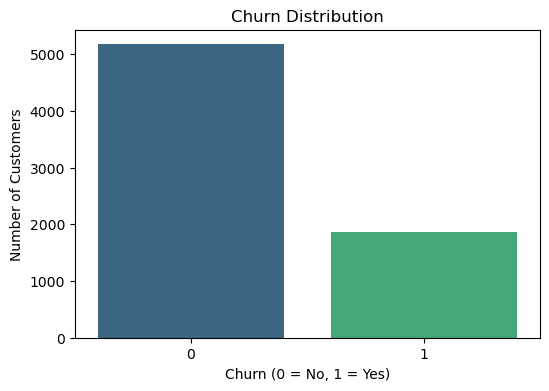

In [14]:
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="viridis")
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.show()

The bar chart illustrates the distribution of churn status among customers. It shows that the majority of customers, represented by category 0 (No Churn), did not churn, with a count exceeding 5000. In contrast, a smaller portion of customers, represented by category 1 (Churn), did churn, with a count of approximately 2000. This highlights a noticeable imbalance in the churn distribution, with significantly more customers retaining their subscriptions compared to those who left.

c:\Users\acoyg\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


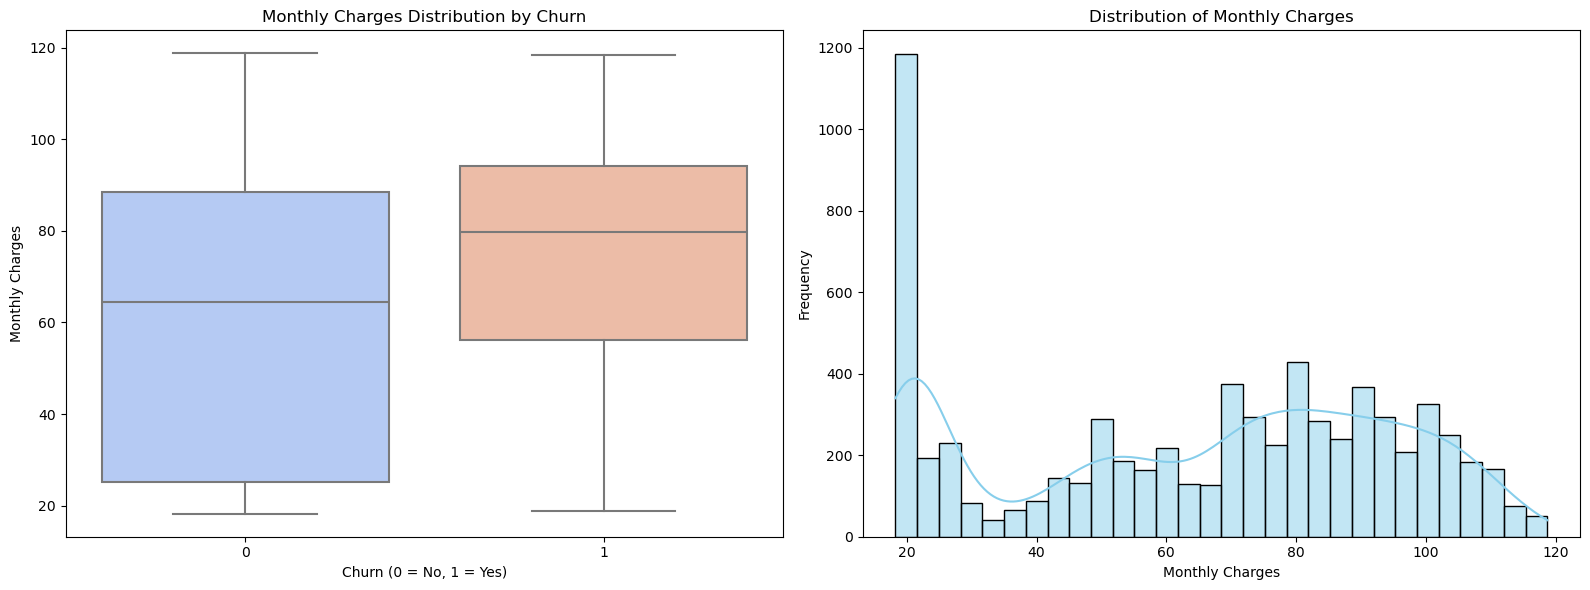

In [15]:
df['Churn_str'] = df['Churn'].astype(str)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

sns.boxplot(data=df, x='Churn_str', y='MonthlyCharges', palette="coolwarm", ax=axes[0])
axes[0].set_title("Monthly Charges Distribution by Churn")
axes[0].set_xlabel("Churn (0 = No, 1 = Yes)")
axes[0].set_ylabel("Monthly Charges")

sns.histplot(df['MonthlyCharges'], kde=True, bins=30, color="skyblue", ax=axes[1])
axes[1].set_title("Distribution of Monthly Charges")
axes[1].set_xlabel("Monthly Charges")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


- **Box Plot (Left)**: Visualizes the "Monthly Charges" distribution grouped by churn status (0 = No Churn, 1 = Churn). It shows the median charges, interquartile range (IQR), and outliers for each group. Customers who churn (1) generally have higher monthly charges compared to those who do not churn (0), indicated by a higher median and slightly larger range.

- **Histogram (Right)**: Illustrates the frequency distribution of "Monthly Charges" across all customers. The histogram reveals a right-skewed distribution with a peak in the lower range (around $20-$30), suggesting that a significant number of customers have low monthly charges, while higher charges taper off gradually.

Note: 

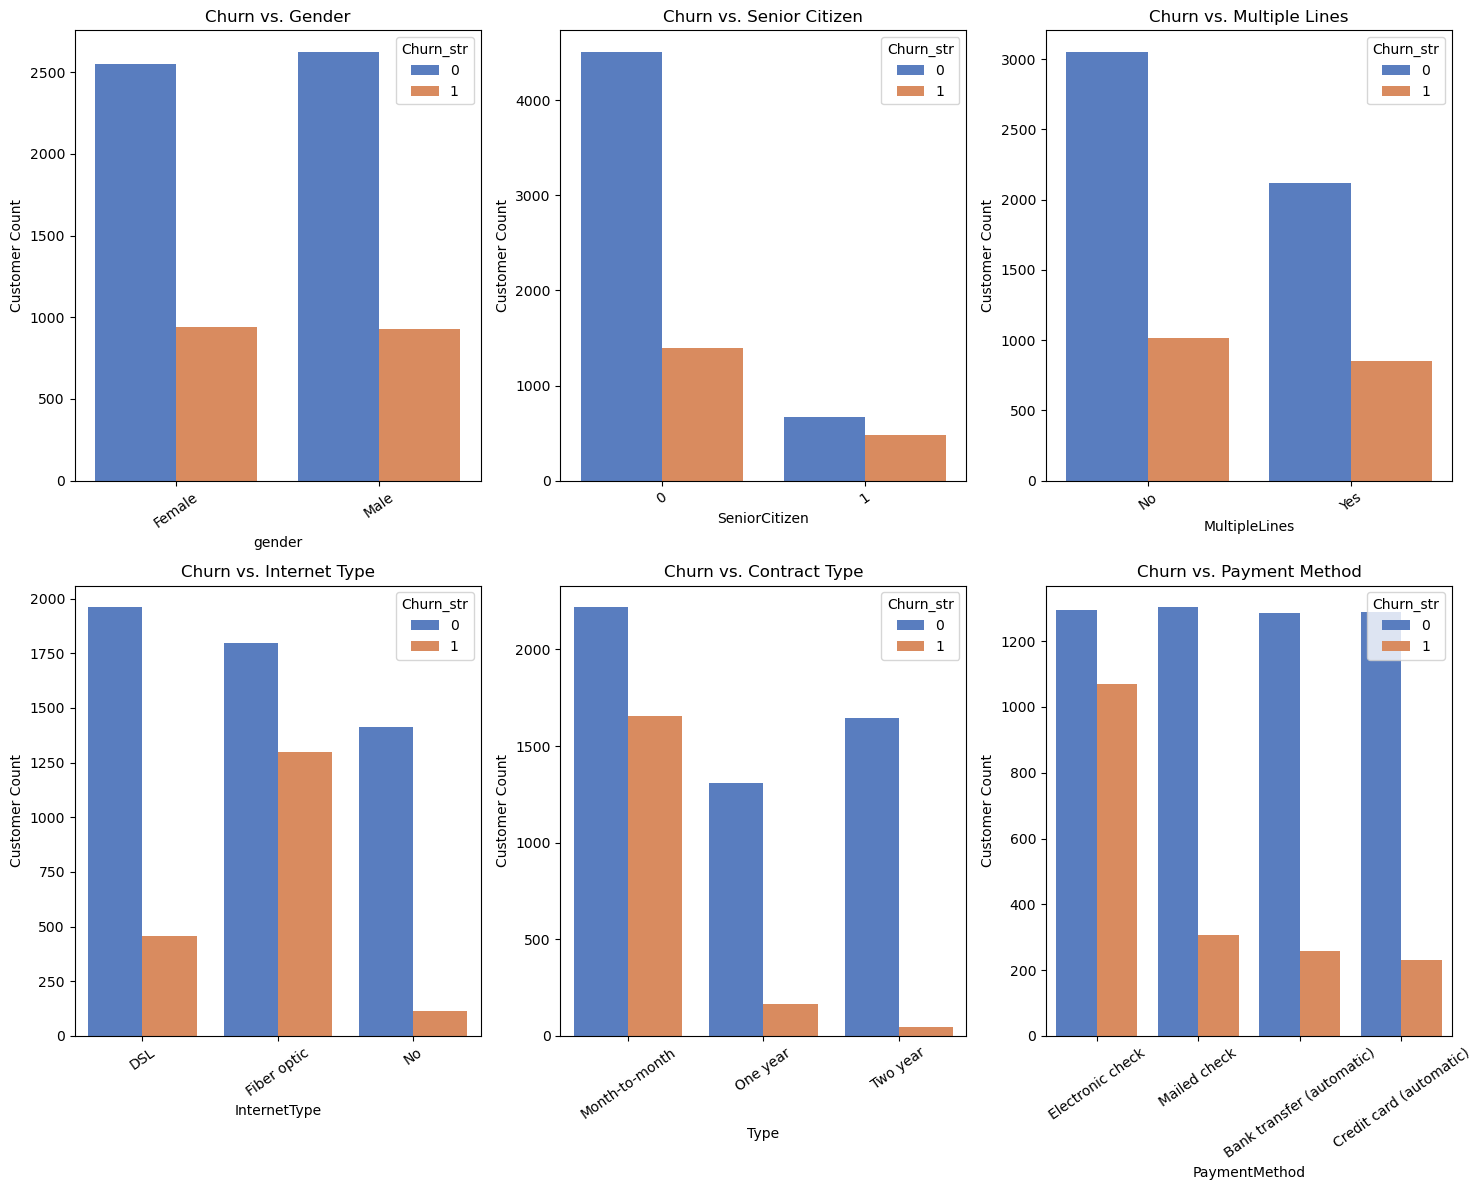

In [17]:
columns_graph = {
    'gender': 'Churn vs. Gender',
    'SeniorCitizen': 'Churn vs. Senior Citizen',
    'MultipleLines': 'Churn vs. Multiple Lines',
    'InternetType': 'Churn vs. Internet Type',
    'Type': 'Churn vs. Contract Type',
    'PaymentMethod': 'Churn vs. Payment Method',
}

max_cols = 3
n_cols = min(max_cols, len(columns_graph))
n_rows = (len(columns_graph) + max_cols - 1) // max_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 6 * n_rows))
axes = axes.flatten()

for (col, title), ax in zip(columns_graph.items(), axes):
    if col in ['MonthlyCharges', 'TotalCharges']:
        sns.boxplot(data=df, x='Churn_str', y=col, palette="muted", ax=ax)
        ax.set_ylabel(col)
    sns.countplot(data=df, x=col, hue='Churn_str', palette="muted", ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel("Customer Count")
    ax.set_title(title)
    ax.tick_params(axis='x', rotation=35)

for ax in axes[len(columns_graph):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()



- **Churn vs. Gender**: Churn rates are similar for both genders, indicating minimal influence of gender on churn.  
- **Churn vs. Senior Citizen**: Senior citizens have a higher proportion of churn compared to non-senior customers.  
- **Churn vs. Multiple Lines**: Customers with multiple lines show higher churn compared to those without.  
- **Churn vs. Internet Type**: Fiber optic users experience higher churn rates than DSL or no internet service customers.  
- **Churn vs. Contract Type**: Month-to-month contract customers have significantly higher churn rates than one- or two-year contract customers.  
- **Churn vs. Payment Method**: Customers paying via electronic check have the highest churn rates compared to other payment methods.  